In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
playersurl <-"https://raw.githubusercontent.com/Alexis-Jang/Group7-DSCI100project/refs/heads/main/DSCI%20100%20Players.csv"
players.csv <- "players.csv"
download.file(playersurl,players.csv, mode = "wb")
players1 <- read.csv(players.csv)
head(players1)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The players data set has 196 observations in this data set. It tells us that there are 7 variables. Below are the variables and their relevant summary statistics:
  
`experience` - character (chr) data type
- Experience level(Amateur, Regular, Pro, Veteran)

`subscribe` - logical (log) data type
- Whether or not the player subscribed
  - FALSE: 52
  - TRUE: 144

`hashedEmail` - as a character (chr) data type
- The player's email (hidden)

`played_hours` - as a double (dbl) data type
- The hours spent playing on the server 
    - minimum: 0.000 
    - maximum: 223.100
    - median: 0.100
    - mean: 5.846
    - standard deviation: 28.35734 

`name` - as a character (chr) data type
- The player's name

`gender` - as a character (chr) data type
- The player's gender

`Age` - as a double (dbl) data type
- The player's age
    - minimum: 8.00
    - maximum: 50.00
    - median: 19.00
    - mean: 20.52
    - standard deviation: 6.174667
    - NAs: 2 -> This means that 2 players did not disclose their age

In [4]:
players <- players1 |>
    select(Age, played_hours)
head(players)

,Age,played_hours
,<int>,<dbl>
1,9,30.3
2,17,3.8
3,17,0.0
4,21,0.7
5,21,0.1
6,17,0.0


In [5]:
players_split <- initial_split(players, prop = 0.60, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


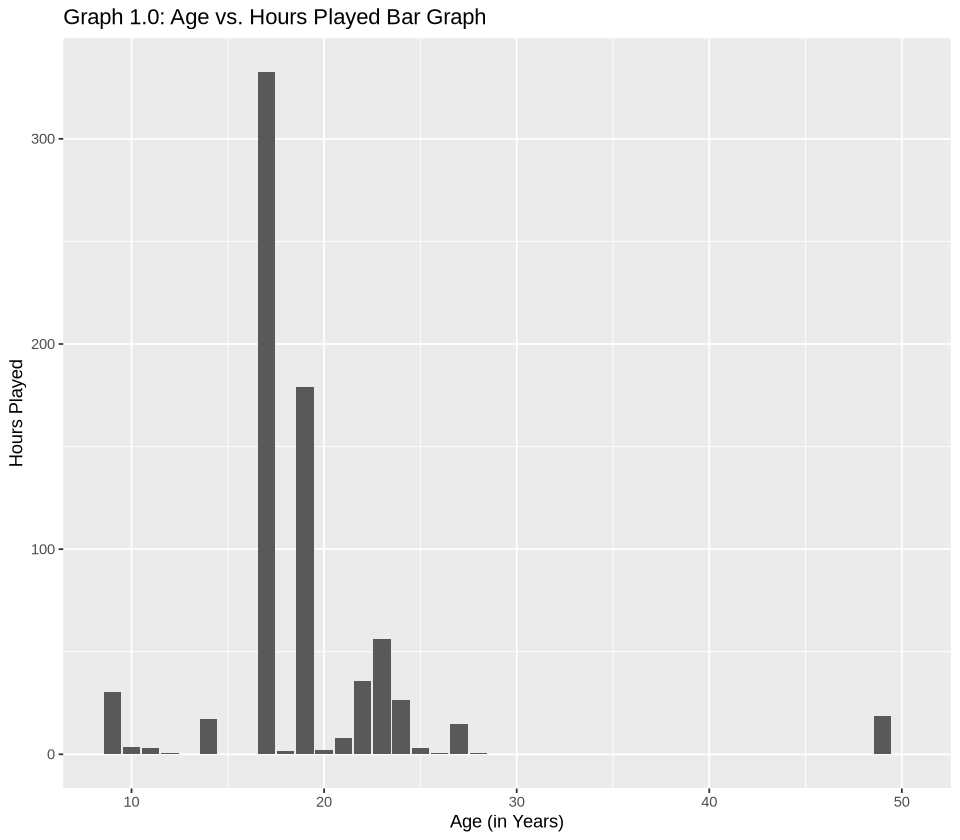

In [6]:
options(repr.plot.width = 8, repr.plot.height = 7)
age_plot <- players_training|>
    ggplot(aes(x = Age, y = played_hours))+
            geom_bar(stat = "identity") +
    labs(x = "Age (in Years)", y = "Hours Played", title = "Graph 1.0: Age vs. Hours Played Bar Graph") +
    theme(element_text(size = 15))
age_plot

In [9]:
players_grouped <- players|>
    group_by(Age)|>
    summarize(mean_played_time = mean(played_hours))
players_grouped

Age,mean_played_time
<int>,<dbl>
8,0.3000000
9,30.3000000
10,3.6000000
11,2.9000000
12,0.5000000
14,8.7000000
15,0.1000000
16,50.0333333
17,4.7573333


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


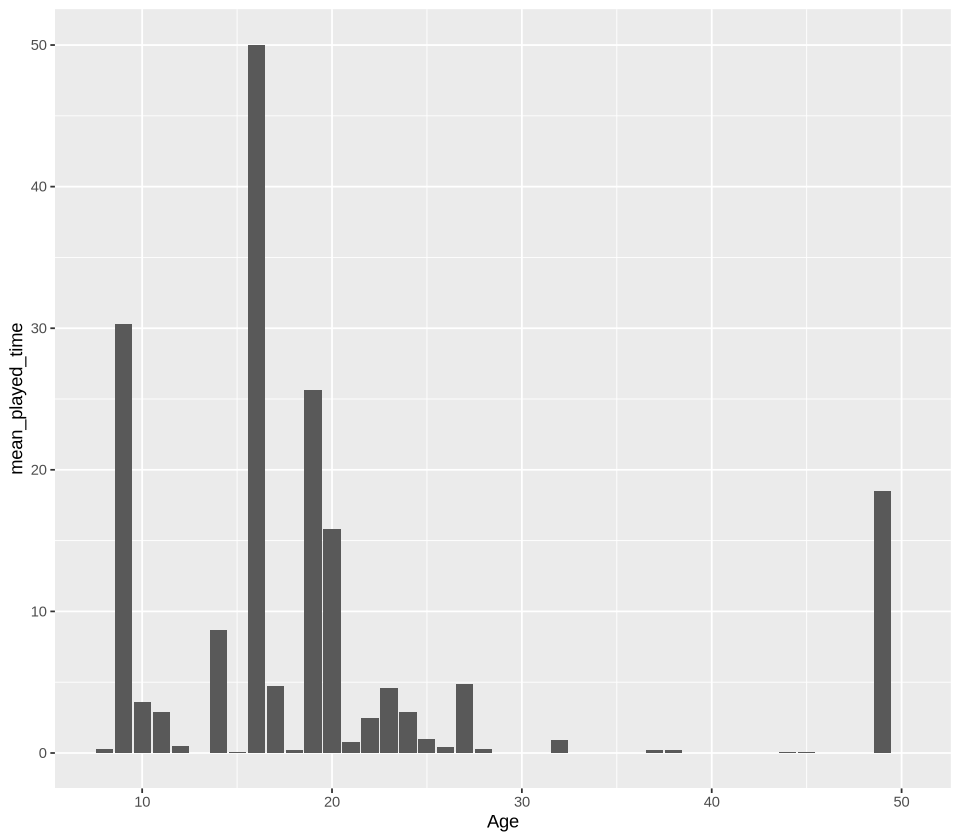

In [14]:
players_grouped_graph <- players_grouped|>
    ggplot(aes(x = Age, y = mean_played_time))+
    geom_bar(stat = "identity")
players_grouped_graph